In [1]:
pip install ucimlrepo

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets
df_adult=pd.DataFrame(X)
df_adult['Target']=y
df_adult.head(10)
# metadata
# print(adult.metadata)

# variable information
# print(adult.variables)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  Target          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df_adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
print(df_adult["Target"].unique())

['<=50K' '>50K' '<=50K.' '>50K.']


In [79]:
df_adult["Target"] = df_adult["Target"].map({
    "<=50K": 1,
    "<=50K.": 1,
    ">50K": 0,
    ">50K.": 0
})

In [80]:
df_adult["sex"] = df_adult["sex"].map({"Male": 1, "Female": 0})

In [81]:
print(df_adult["Target"].unique())

[1 0]


In [82]:
df_adult.describe()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,Target
count,48842.000000,4.884200e+04,48842.000000,0.0,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,NaN,1079.067626,87.502314,40.422382,0.760718
std,13.710510,1.056040e+05,2.570973,NaN,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,NaN,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,NaN,0.000000,0.000000,40.000000,1.000000
50%,37.000000,1.781445e+05,10.000000,NaN,0.000000,0.000000,40.000000,1.000000
75%,48.000000,2.376420e+05,12.000000,NaN,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.490400e+06,16.000000,NaN,99999.000000,4356.000000,99.000000,1.000000


In [58]:
# df_adult[~df_adult['Target'].isin(['<=50K', '>50K'])]
# df_adult[(~df_adult['Target'].isin(['<=50K', '>50K'])) | (df_adult['Target'].isnull())]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Target


In [85]:
len1=len(df_adult[df_adult["Target"]==0])
len2=len(df_adult[df_adult["Target"]==1])
print(f"Where Target is >50K: {len1}")
print(f"Where Target is <=50K: {len2}")

Where Target is >50K: 11687
Where Target is <=50K: 37155


In [ ]:
# so we can add dummy values to ">50K" so that our model give more accurate but 1st try with above dataset also we can use Class_weight='imbalanced' take equal data

In [86]:
# ls=pd.Series(df_adult["Target"])
df=df_adult

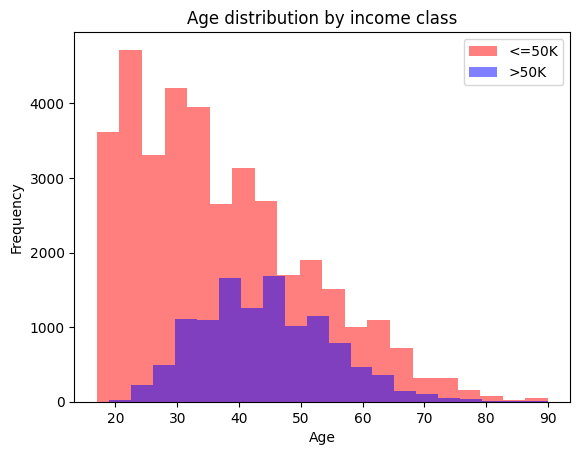

In [90]:
plt.hist(df[df["Target"] == 1]["age"], bins=20, alpha=0.5, label="<=50K", color='red')
plt.hist(df[df["Target"] != 1]["age"], bins=20, alpha=0.5, label=">50K", color='blue')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution by income class")
plt.legend()
plt.show()

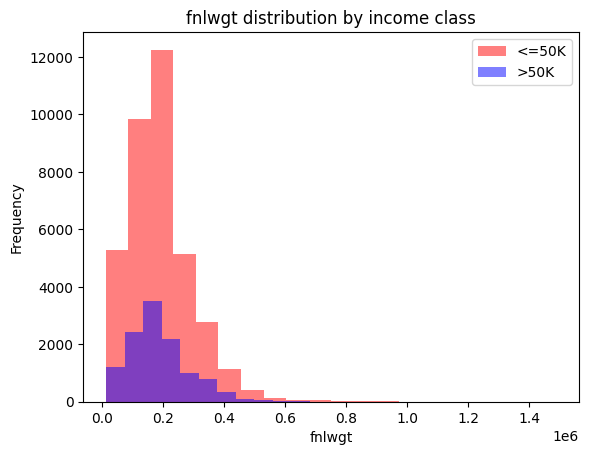

In [15]:
plt.hist(df[df["Target"] == "<=50K"]["fnlwgt"], bins=20, alpha=0.5, label="<=50K", color='red')
plt.hist(df[df["Target"] != "<=50K"]["fnlwgt"], bins=20, alpha=0.5, label=">50K", color='blue')
plt.xlabel("fnlwgt")
plt.ylabel("Frequency")
plt.title("fnlwgt distribution by income class")
plt.legend()
plt.show()

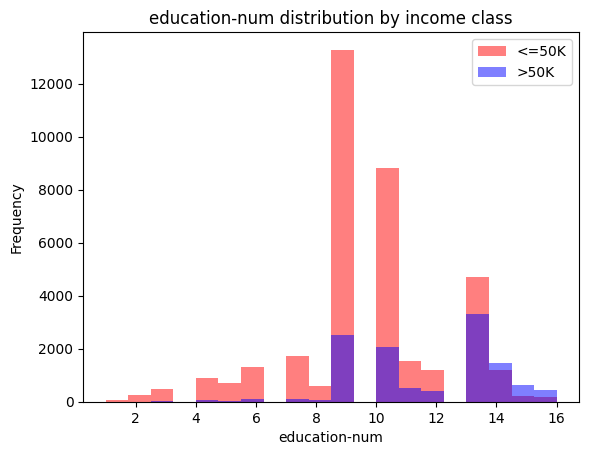

In [16]:
plt.hist(df[df["Target"] == "<=50K"]["education-num"], bins=20, alpha=0.5, label="<=50K", color='red')
plt.hist(df[df["Target"] != "<=50K"]["education-num"], bins=20, alpha=0.5, label=">50K", color='blue')
plt.xlabel("education-num")
plt.ylabel("Frequency")
plt.title("education-num distribution by income class")
plt.legend()
plt.show()

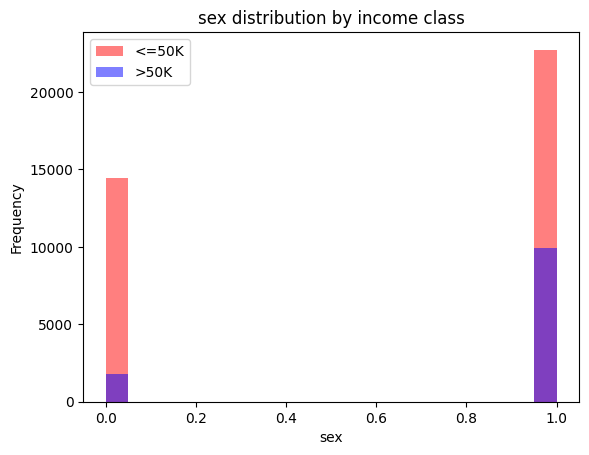

In [17]:
plt.hist(df[df["Target"] == "<=50K"]["sex"], bins=20, alpha=0.5, label="<=50K", color='red')
plt.hist(df[df["Target"] != "<=50K"]["sex"], bins=20, alpha=0.5, label=">50K", color='blue')
plt.xlabel("sex")
plt.ylabel("Frequency")
plt.title("sex distribution by income class")
plt.legend()
plt.show()

In [91]:
df_adult_encoded = pd.get_dummies(df_adult)
# df_adult_encoded.info()
df_adult_encoded.describe()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,Target
count,48842.000000,4.884200e+04,48842.000000,0.0,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,NaN,1079.067626,87.502314,40.422382,0.760718
std,13.710510,1.056040e+05,2.570973,NaN,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,NaN,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,NaN,0.000000,0.000000,40.000000,1.000000
50%,37.000000,1.781445e+05,10.000000,NaN,0.000000,0.000000,40.000000,1.000000
75%,48.000000,2.376420e+05,12.000000,NaN,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.490400e+06,16.000000,NaN,99999.000000,4356.000000,99.000000,1.000000


In [97]:
len1=len(df_adult_encoded[df_adult_encoded["Target"]==1])
print(len1)
len(df_adult_encoded[df_adult_encoded["Target"]==0])

37155


11687

In [98]:
X = df_adult_encoded.drop("Target", axis=1)  # use binary column instead of string
y = df_adult_encoded["Target"]  # 1 if <=50K, 0 otherwise (automatically handled by get_dummies)

In [101]:
y.head(10)

,Target
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,0
8,0
9,0


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## DecisionTreeClassifier

In [103]:
clf = DecisionTreeClassifier(class_weight='balanced',random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [104]:
y_pred = clf.predict(X_test)

In [105]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8135940219060293
Report:
               precision    recall  f1-score   support

           0       0.61      0.62      0.62      2355
           1       0.88      0.88      0.88      7414

    accuracy                           0.81      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.81      0.81      0.81      9769



## RandomForestClassifier

In [108]:
# RandomForestClassifier
clf2=RandomForestClassifier(class_weight='balanced',random_state=42)
clf2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [110]:
y_pred1=clf2.predict(X_test)

In [111]:
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Report:\n", classification_report(y_test, y_pred1))

Accuracy: 0.8527996724332071
Report:
               precision    recall  f1-score   support

           0       0.73      0.61      0.67      2355
           1       0.88      0.93      0.91      7414

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769



In [ ]:
# x = df_adult.index
# y = df_adult["age"]
# labels = df_adult["Target"]

# # Map labels to numbers or colors
# colors = labels.map({">50K": "green", "<=50K": "red"})

# plt.scatter(x, y, c=colors)
# plt.xlabel("Index")
# plt.ylabel("Age")
# plt.title("Age Distribution by Target")
# plt.show()

In [7]:
cols=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","Target"
]

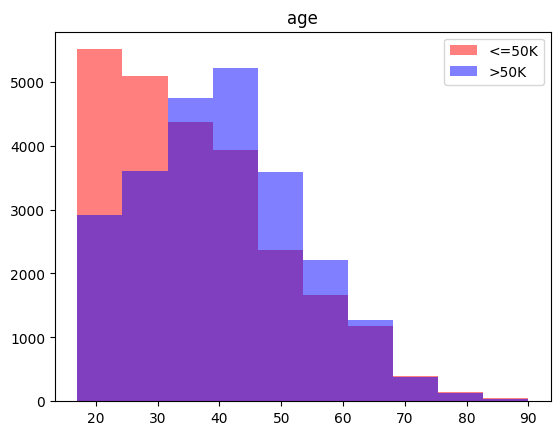

ConversionError: Failed to convert value(s) to axis units: array(['Self-emp-not-inc', 'Private', 'Private', ..., 'Private',
       'Private', 'Self-emp-inc'], dtype=object)

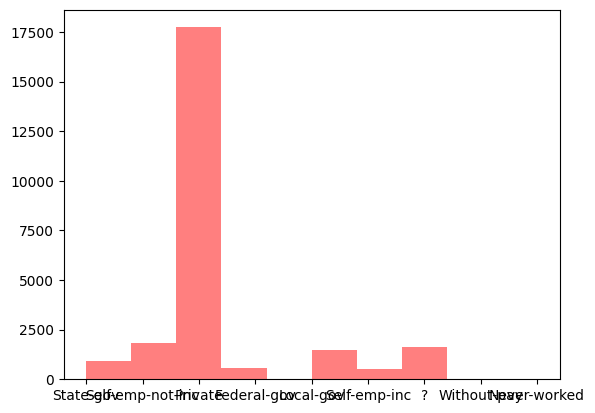

In [11]:
# not as some of the data is in string, so plt only for numerical data or convert string to numerical like male and female to 1 and 0, and other binary data
# for label in cols[:-1]:
#     plt.hist(df[df["Target"] == "<=50K"][label], color='r', alpha=0.5, label='<=50K')
#     plt.hist(df[df["Target"] != "<=50K"][label], color='b', alpha=0.5, label='>50K')
#     plt.title(label)
#     plt.legend()
#     plt.show()